In [199]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import curve_fit
import scipy.signal as spy
import glob
import time
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import imageio
import moviepy.editor as mpy
import pandas as pd
print(time.ctime())
#%matplotlib inline
%matplotlib notebook
import cmocean
import mpld3
mpld3.enable_notebook()

Fri Aug 31 18:28:46 2018


In [2]:
def data_gather(datasource, centered):
    #The function decides which data file you want based on the source, and whether 
    # you want the centered version or not. 
    #the offset is currently hardcoded based on a value all the values shared
    #still thinking about a way have it be variable
    if datasource == 0:
        directory = '/home/andrew/Documents/BNL 2018/Data/'
        file = directory + 'PolA000PolB000_DiodeCurrent_40,2mAW0028_H11-180711-162519-1.csv'
        data=np.loadtxt(file, dtype= float, delimiter=",", usecols = (0,1,2,3))

        if centered  ==  1:
            file = directory + 'PolA000PolB000_DiodeCurrent_35,2mAW0028_H11-180711-164524-1_cent.csv'
            data=np.loadtxt(file, dtype= float, delimiter=",", usecols = (0,1,2,3))
        x = data[:, 0]                                                          # places data in separate arrays
        y = data[:, 1]
        t = data[:, 2]
        a = data[:, 3]
    return x,y,t,a

In [3]:
def clean(x,y,t,a, n = np.empty(1), size = 50000000):
   # a function that for lack of a better term, cleans up the data. 
    #It applies the offset to time and converts to nanoseconds
    # Takes a much smaller slice of data, and has the option to delete old massive arrays
    xdata = x[0:size]
    ydata= y[0:size]
    adata = a[0:size]
    ndata = n[0:size]
    trough = t[0:size]
    trough = trough[0:size] -trough[0]
    tdata = trough/(2**12)*25
    if len(ndata) > 10:                  
        return (xdata,ydata,tdata,adata, ndata)
    else:
        return(xdata,ydata,tdata,adata)

In [4]:
x,y,t,a = data_gather(0,0)


In [5]:
xdata, ydata,tdata,adata = clean(x,y,t,a)

In [6]:
map = pd.DataFrame({'x': xdata,'y': ydata,'t': tdata,'a': adata})

In [283]:
tdata[3569]/1000

9996.421875

In [297]:
TOT = np.zeros([256,256] )
TOTcts = np.zeros([256,256])
for i in range(1738):
    x_i = np.abs(xdata[i].astype(int)-255)
    y_i = ydata[i].astype(int) 
    TOT[x_i,y_i] += tdata[i]
    TOTcts[x_i,y_i]+= 1

In [299]:
size =6
TOTblock = np.zeros([size,size])
TOTblockcts = np.zeros([size,size])
TOTblock1 = np.zeros([size,size])
TOTblockcts1 = np.zeros([size,size])
TOTblock2 = np.zeros([size,size])
TOTblockcts2 = np.zeros([size,size])
TOTblock3 = np.zeros([size,size])
TOTblockcts3 = np.zeros([size,size])
lowx = 114
lowy = 138
for i in range(1000):
    if xdata[i] > lowx and xdata[i] < lowx + size and ydata[i] > lowy and ydata[i] < lowy + size:
        x_i = xdata[i].astype(int)-lowx
        y_i = ydata[i].astype(int)-lowy
        TOTblock[x_i,y_i] += tdata[i]
        TOTblockcts[x_i,y_i]+= 1
lowx = 83
lowy = 146
for i in range(1000):
    if xdata[i] > lowx and xdata[i] < lowx + size and ydata[i] > lowy and ydata[i] < lowy + size:
        x_i = xdata[i].astype(int)-lowx
        y_i = ydata[i].astype(int)-lowy
        TOTblock1[x_i,y_i] += tdata[i]
        TOTblockcts1[x_i,y_i]+= 1
lowx = 180
lowy = 73        
for i in range(1000):
    if xdata[i] > lowx and xdata[i] < lowx + size and ydata[i] > lowy and ydata[i] < lowy + size:
        x_i = xdata[i].astype(int)-lowx
        y_i = ydata[i].astype(int)-lowy
        TOTblock2[x_i,y_i] += tdata[i]
        TOTblockcts2[x_i,y_i]+= 1
lowx = 163
lowy = 172 
for i in range(1000):
    if xdata[i] > lowx and xdata[i] < lowx + size and ydata[i] > lowy and ydata[i] < lowy + size:
        x_i = xdata[i].astype(int)-lowx
        y_i = ydata[i].astype(int)-lowy
        TOTblock3[x_i,y_i] += tdata[i]
        TOTblockcts3[x_i,y_i]+= 1

<IPython.core.display.Javascript object>


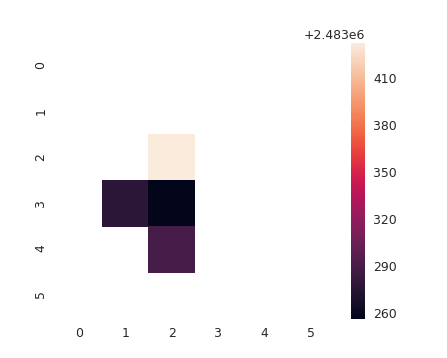

In [294]:
blockplot = TOTblock/TOTblockcts
blockplot1 = TOTblock1/TOTblockcts1
blockplot2 = TOTblock2/TOTblockcts2
blockplot3 = TOTblock3/TOTblockcts3
#blockplot = TOTblockcts
plt.figure(figsize = (5,4))
sns.heatmap(blockplot3)
plt.show()

<IPython.core.display.Javascript object>


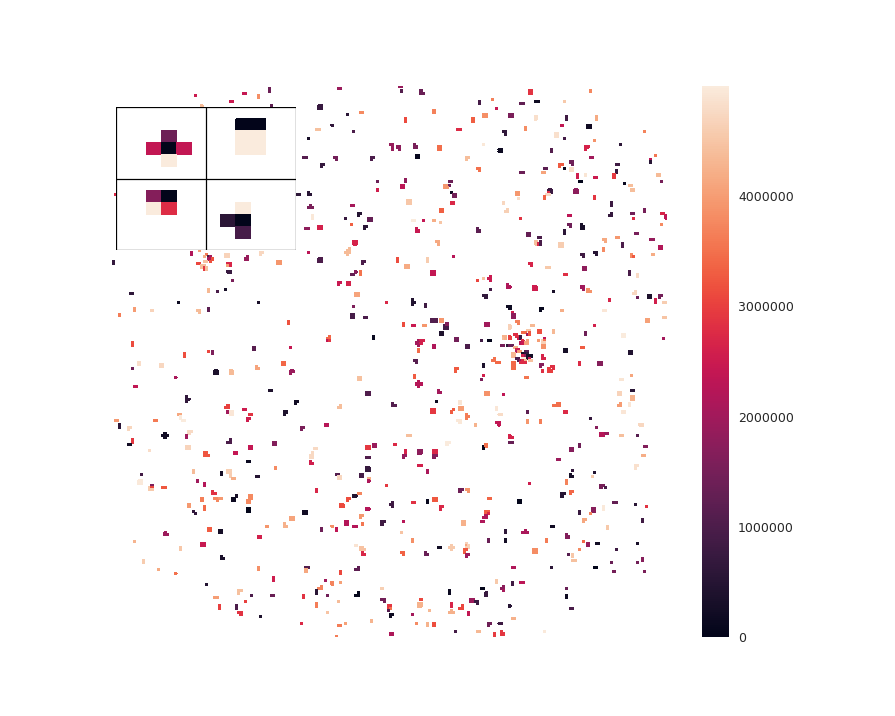

In [300]:
plot = TOT/TOTcts
#plot = TOTcts
fig = plt.figure(figsize = (10,8))
sns.heatmap(plot, yticklabels=False,xticklabels=False)
ax1 = fig.add_axes([0.13, 0.75, 0.1, 0.1],
                   xticklabels=[], yticklabels = [])
sns.heatmap(blockplot,ax=ax1, yticklabels=False,xticklabels=False, cbar = False)
ax1.axhline(y=0, color='k',linewidth=1)
ax1.axhline(y=blockplot.shape[1], color='k',linewidth=1)
ax1.axvline(x=0, color='k',linewidth=1)
ax1.axvline(x=blockplot.shape[0], color='k',linewidth=1)
ax2 = fig.add_axes([0.23, 0.75, 0.1, 0.1],
                   xticklabels=[], yticklabels = [])
sns.heatmap(blockplot1,ax=ax2, yticklabels=False,xticklabels=False, cbar = False)
ax2.axhline(y=0, color='k',linewidth=1)
ax2.axhline(y=blockplot1.shape[1], color='k',linewidth=1)
ax2.axvline(x=0, color='k',linewidth=1)
ax2.axvline(x=blockplot1.shape[0], color='k',linewidth=1)
ax3 = fig.add_axes([0.13, 0.65, 0.1, 0.1],
                   xticklabels=[], yticklabels = [])
sns.heatmap(blockplot2,ax=ax3, yticklabels=False,xticklabels=False, cbar = False)
ax3.axhline(y=0, color='k',linewidth=1)
ax3.axhline(y=blockplot1.shape[1], color='k',linewidth=1)
ax3.axvline(x=0, color='k',linewidth=1)
ax3.axvline(x=blockplot1.shape[0], color='k',linewidth=1)
ax4 = fig.add_axes([0.23, 0.65, 0.1, 0.1],
                   xticklabels=[], yticklabels = [])
sns.heatmap(blockplot3,ax=ax4, yticklabels=False,xticklabels=False, cbar = False)
ax4.axhline(y=0, color='k',linewidth=1)
ax4.axhline(y=blockplot1.shape[1], color='k',linewidth=1)
ax4.axvline(x=0, color='k',linewidth=1)
ax4.axvline(x=blockplot1.shape[0], color='k',linewidth=1)
plt.show()

<IPython.core.display.Javascript object>


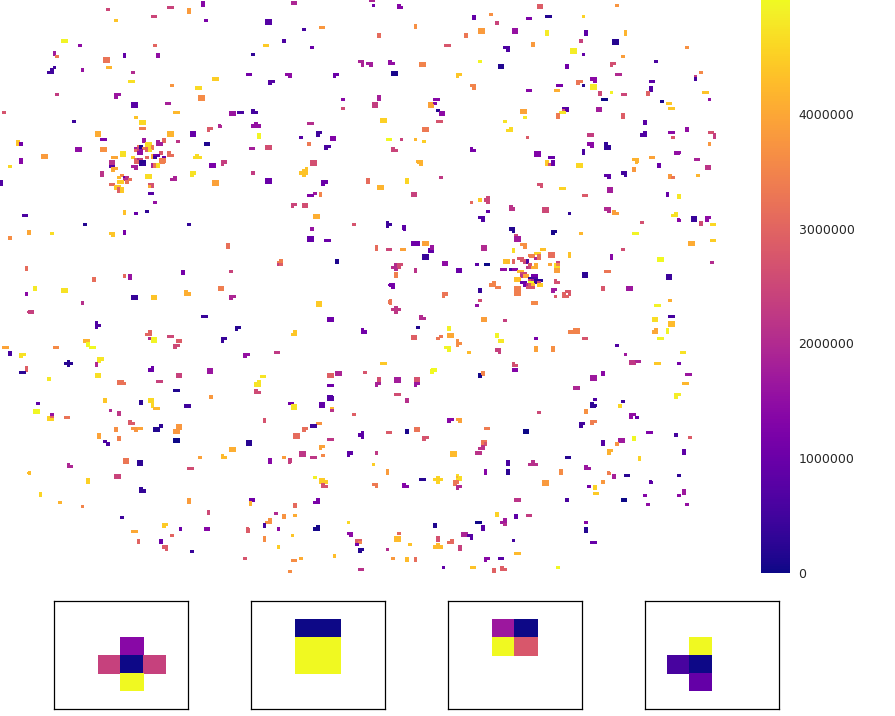

In [301]:
plot = TOT/TOTcts
#plot = TOTcts
fig = plt.figure(figsize = (10,8))
ax0 = fig.add_axes([0, 0.2, 1, 0.8])
sns.heatmap(plot, ax = ax0,cmap = 'plasma', yticklabels=False,xticklabels=False)
ax1 = fig.add_axes([0.06, 0.01, 0.15, 0.15],
                   xticklabels=[], yticklabels = [])
sns.heatmap(blockplot,ax=ax1, cmap = 'plasma', yticklabels=False,xticklabels=False, cbar = False)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_visible(True)
    ax1.spines[axis].set_color('black')
    ax1.spines[axis].set_visible(True)
    ax1.spines[axis].set_color('black') 
ax2 = fig.add_axes([0.28, 0.01, 0.15, 0.15],
                   xticklabels=[], yticklabels = [])
sns.heatmap(blockplot1,ax=ax2,cmap = 'plasma', yticklabels=False,xticklabels=False, cbar = False)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_visible(True)
    ax2.spines[axis].set_color('black')
    ax2.spines[axis].set_visible(True)
    ax2.spines[axis].set_color('black')
ax3 = fig.add_axes([0.5, 0.01, 0.15, 0.15],
                   xticklabels=[], yticklabels = [])
sns.heatmap(blockplot2,ax=ax3,  cmap = 'plasma',yticklabels=False,xticklabels=False, cbar = False)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_visible(True)
    ax3.spines[axis].set_color('black')
    ax3.spines[axis].set_visible(True)
    ax3.spines[axis].set_color('black') 
ax4 = fig.add_axes([0.72, 0.01, 0.15, 0.15],
                   xticklabels=[], yticklabels = [])
sns.heatmap(blockplot3,ax=ax4, cmap = 'plasma', yticklabels=False,xticklabels=False, cbar = False)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_visible(True)
    ax4.spines[axis].set_color('black')
    ax4.spines[axis].set_visible(True)
    ax4.spines[axis].set_color('black') 
plt.show()

In [11]:
def slicer(xdata,ydata,adata,tdata,del_t = 5000, frames = 25 ):
    #Takes in all the data, right now doesn't need ndata? Not sure how to incorporate
    # del_t is the slicesize in nanoseconds. 5000 is 5 μs & 1000000 is 1 ms
    gif_array = []
    int_array = []
    for i in range(frames):
        index = np.where((tdata >= 0 +(i*del_t)) & (tdata <= del_t+ (i*del_t)))
        xplot = xdata[index]
        yplot= ydata[index]
        tplot = tdata[index]
        aplot = adata[index]
        gif_fill = (xplot,yplot, tplot, aplot )
        gif_array.append(gif_fill)
        
    # creates the array of slices 
    for i in range(len(gif_array)):
        xfill,yfill,tfill, afill,  = gif_array[i]
        if i == 0:
            int_fill = (xfill,yfill, tfill, afill )
        if i > 0:
            xold, yold, told, aold = int_array[i-1]
            xadd = np.concatenate((xold,xfill))
            yadd = np.concatenate((yold,yfill))
            tadd = np.concatenate((told,tfill))
            aadd = np.concatenate((aold,afill))
            int_fill= (xadd,yadd,tadd,aadd)
        int_array.append(int_fill)
    # sums all the slices iteratively
    return(gif_array, int_array)

In [12]:
def gif_plot(start, gif_array, int_array, del_t):
    for i in range(start,len(gif_array)):
        xplot1,yplot1,tplot1, aplot1,  = int_array[i]
        xplot2,yplot2,tplot2, aplot2,  = gif_array[i]    
        # creates an array the size of pixelboard to feed in data for seaborn heatmap
        TOT1 = np.zeros([256,256] )
        TOT2 = np.zeros([256,256] )
        TOT1.fill(np.nan)
        TOT2.fill( np.nan) 
        x1 = xplot1
        y1 = yplot1 
        z1 = aplot1
        x2 = xplot2
        y2 = yplot2
        z2 = aplot2
        min = np.str(i*(del_t/1000))
        max = np.str((del_t/1000)+ i*(del_t/1000))
        print(len(z2))
        for j in range(len(z2)):
            TOT2[np.int(x2[j]),np.int(y2[j])]=z2[j]
        for j in range(len(z1)):
            TOT1[np.int(x1[j]),np.int(y1[j])]=z1[j]
        # Plotting Functionality    
        fig, (ax1, ax2 ) = plt.subplots(ncols =2, figsize=(10, 6), sharex=True, sharey=True)
        plt.suptitle('Hits from '+min+' to '+max+' μs')
        cbar_ax = fig.add_axes([1,.2,.03,.6])
        sns.heatmap(TOT2,cmap='magma', ax = ax1,vmin = 200, vmax = 3000 ,square = True, cbar = False)
        sns.heatmap(TOT1,cmap='magma', ax = ax2, vmin = 200, vmax = 1000, square= True, cbar_ax = cbar_ax)
        fig.tight_layout() 
        i = np.str(i)
        plt.savefig('/home/andrew/Documents/BNL 2018/Coding/gifs/qe/fill_frame_'+i+'.png',  bbox_inches='tight')   
        # change to where you want to save 100  pngs
     

In [13]:
def gif_creation(name, directory):
    # input name is a string
    # gif creation
    gif_name = name
    fps = .2      # frames per second
    os.chdir(directory)     # change this to directory you want 
    file_list = glob.glob('*.png') # Get all the pngs in the current directory   
    file_list = sorted( file_list, key=lambda f: int(''.join(filter(str.isdigit, f)))) 
    print(file_list)
    clip = mpy.ImageSequenceClip(file_list, fps=fps)
    clip.write_gif('{}.gif'.format(gif_name), fps=fps)   


In [21]:
del_t = 10000
start = 0
gif_array, int_array = slicer(xdata,ydata,adata,tdata,del_t =del_t,  frames = 20)


12


<IPython.core.display.Javascript object>


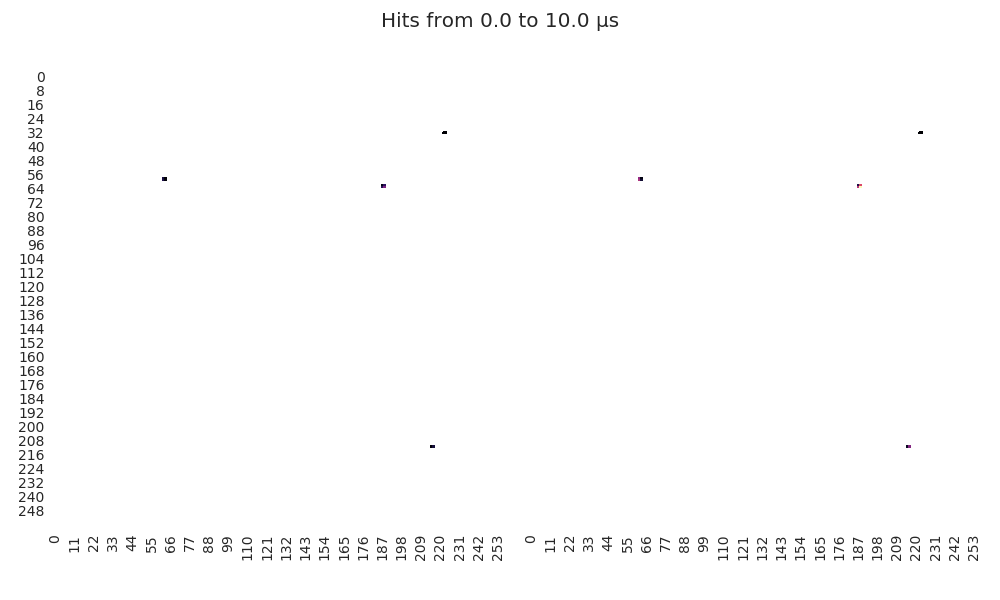

2


<IPython.core.display.Javascript object>


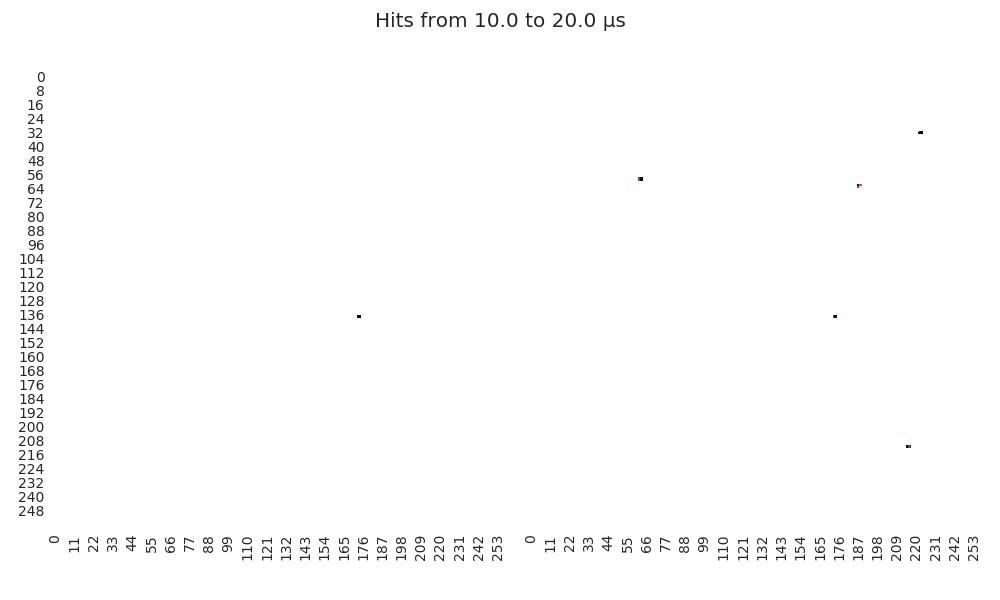

2


<IPython.core.display.Javascript object>


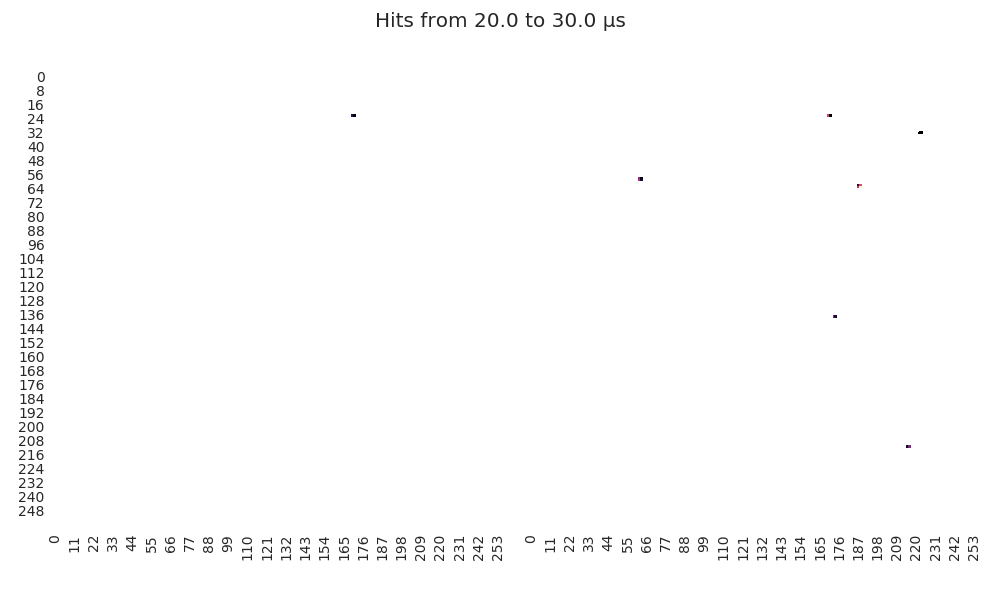

0


<IPython.core.display.Javascript object>


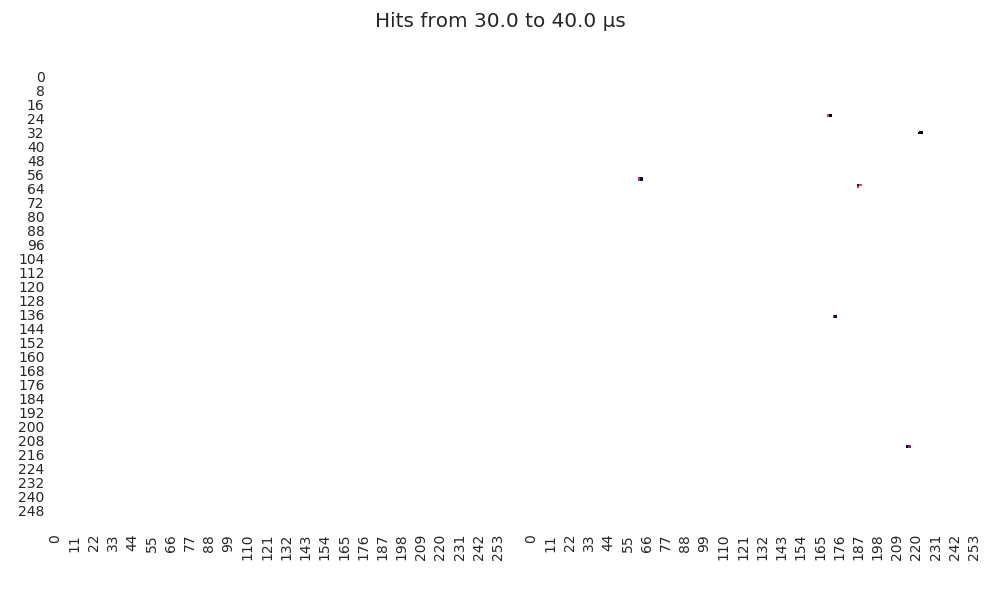

0


<IPython.core.display.Javascript object>


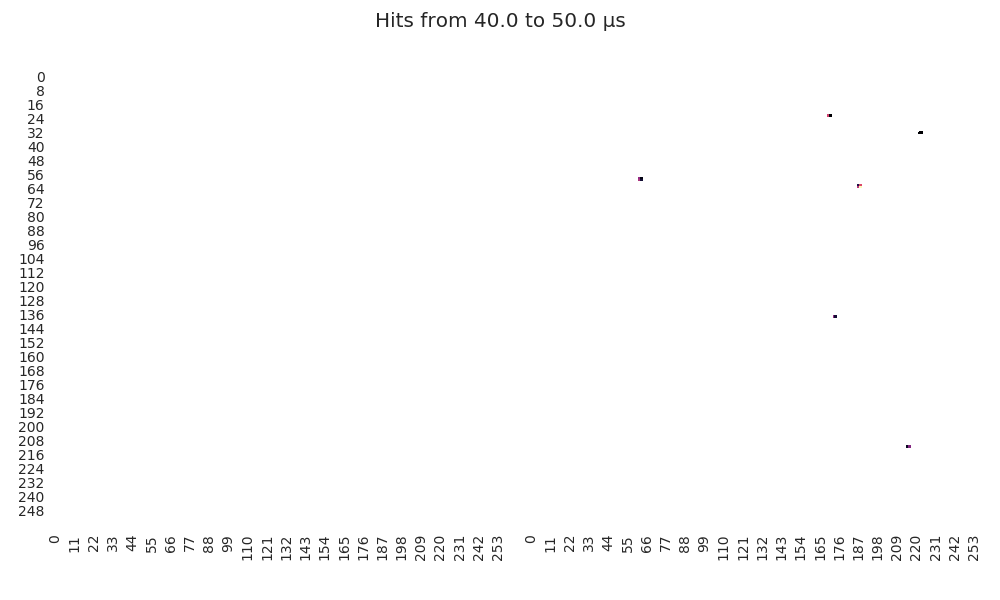

3


<IPython.core.display.Javascript object>


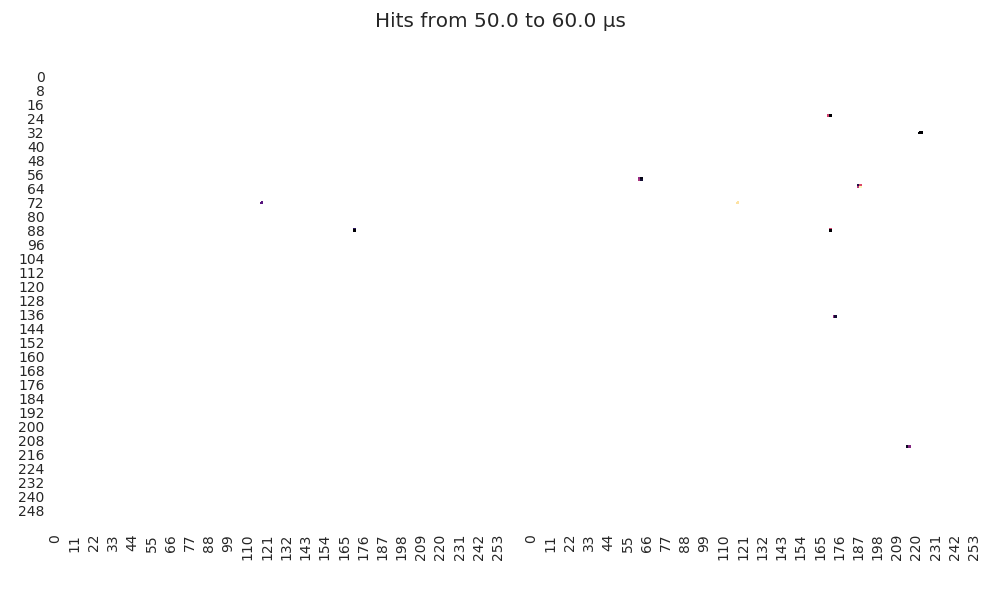

0


<IPython.core.display.Javascript object>


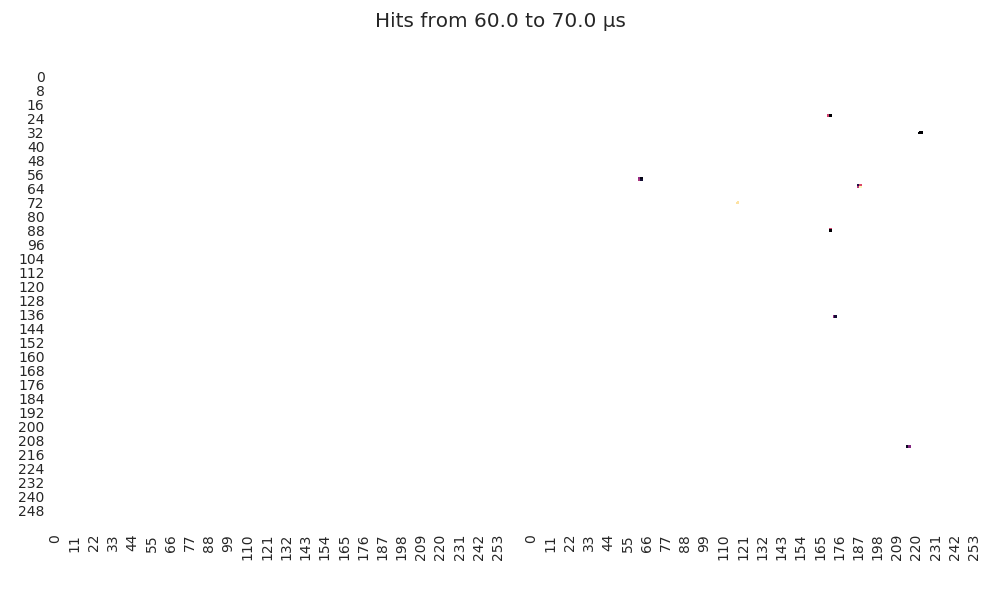

4


<IPython.core.display.Javascript object>


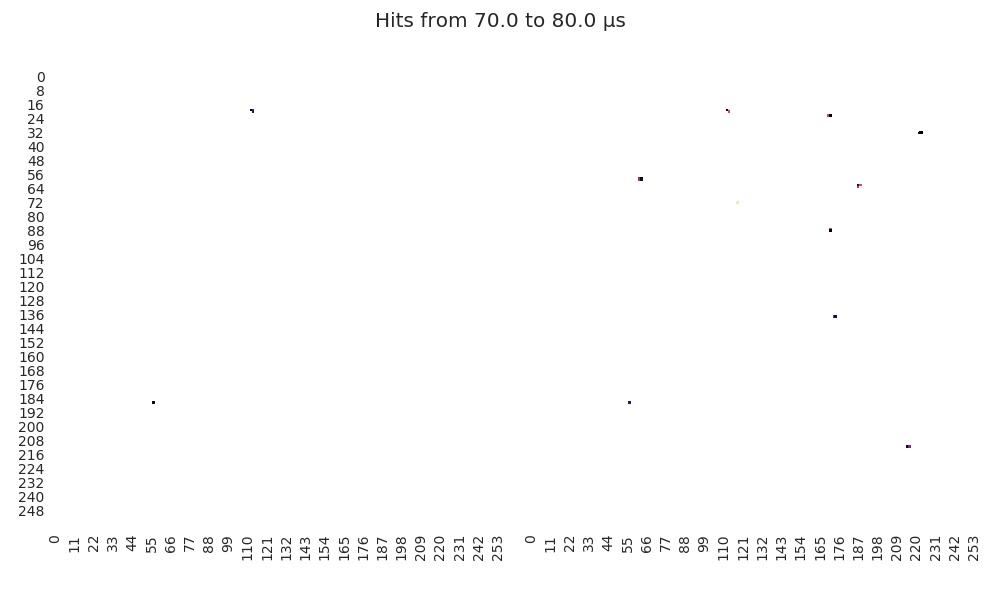

4


<IPython.core.display.Javascript object>


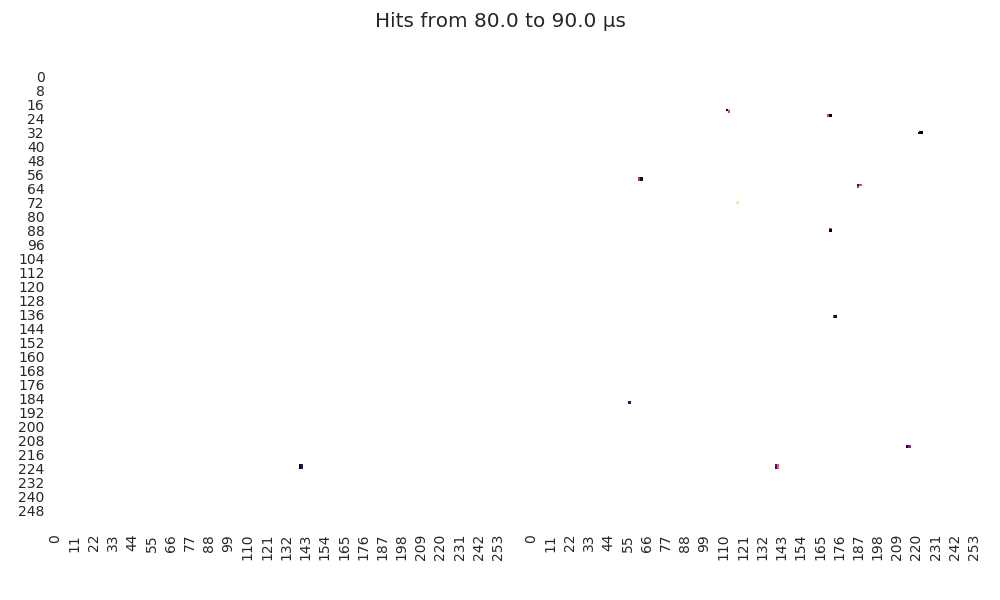

3


<IPython.core.display.Javascript object>


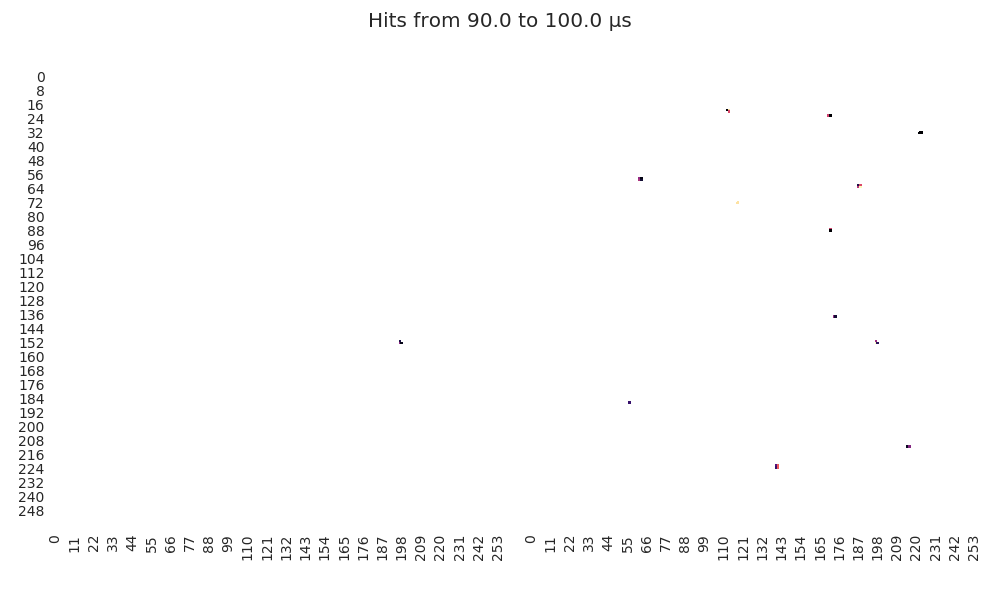

0


<IPython.core.display.Javascript object>


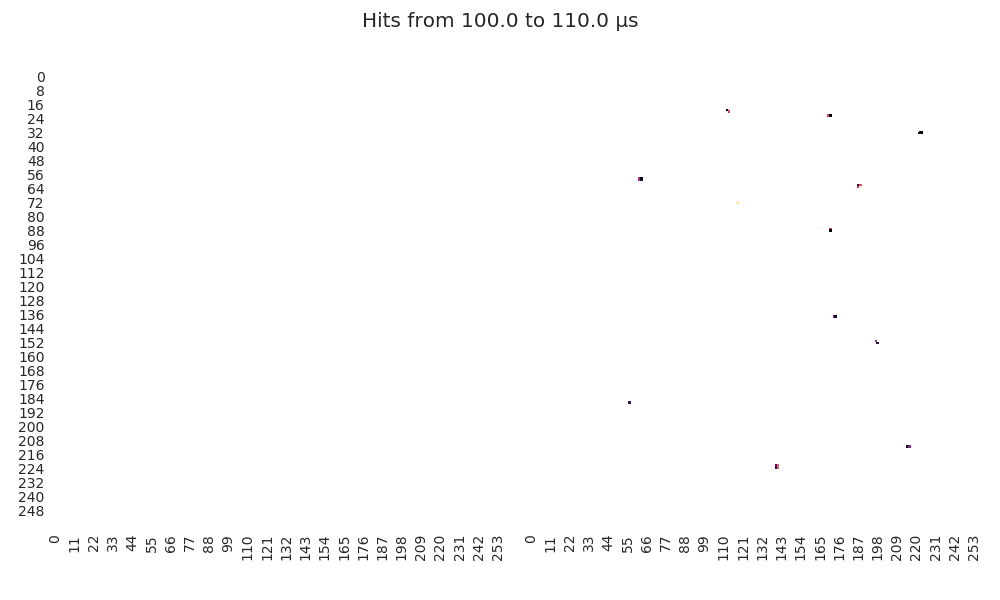

2


<IPython.core.display.Javascript object>


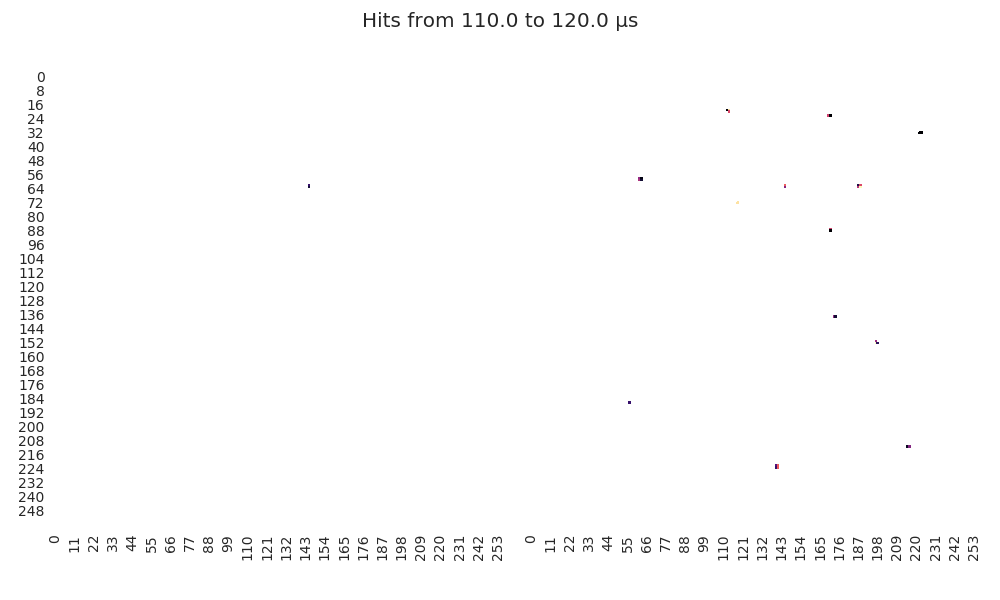

2


<IPython.core.display.Javascript object>


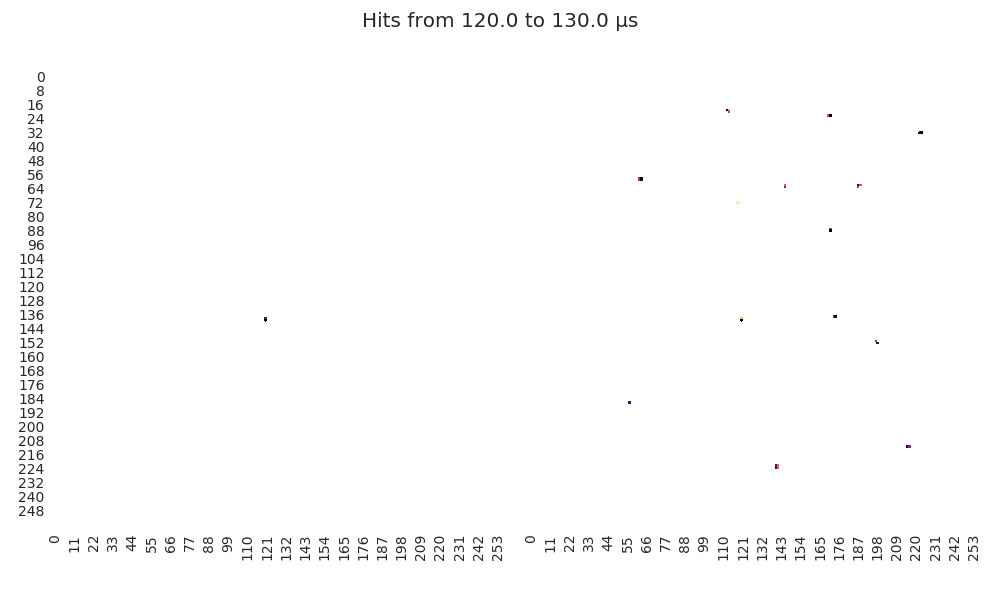

1


<IPython.core.display.Javascript object>


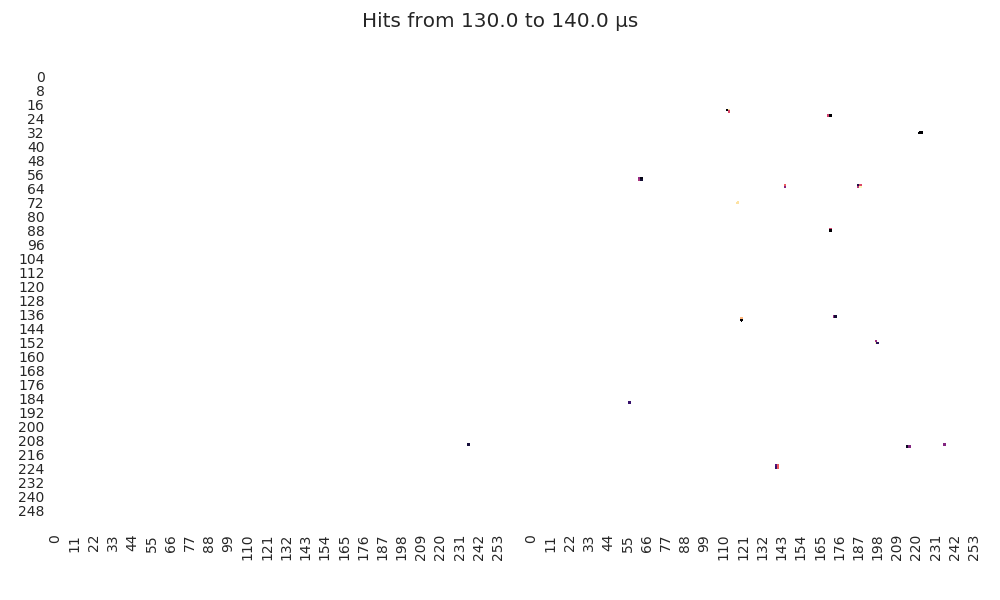

4


<IPython.core.display.Javascript object>


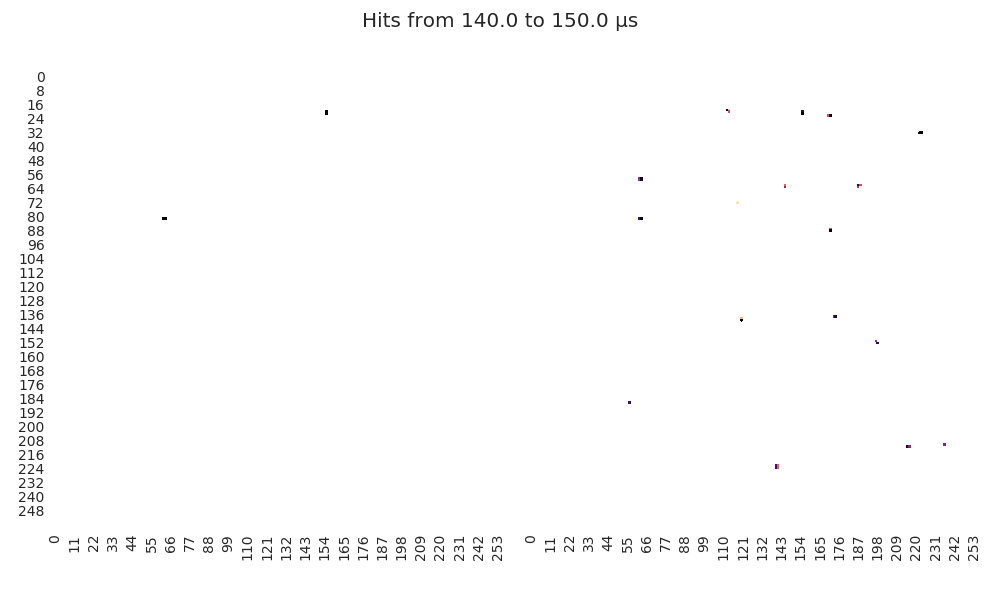

7


<IPython.core.display.Javascript object>


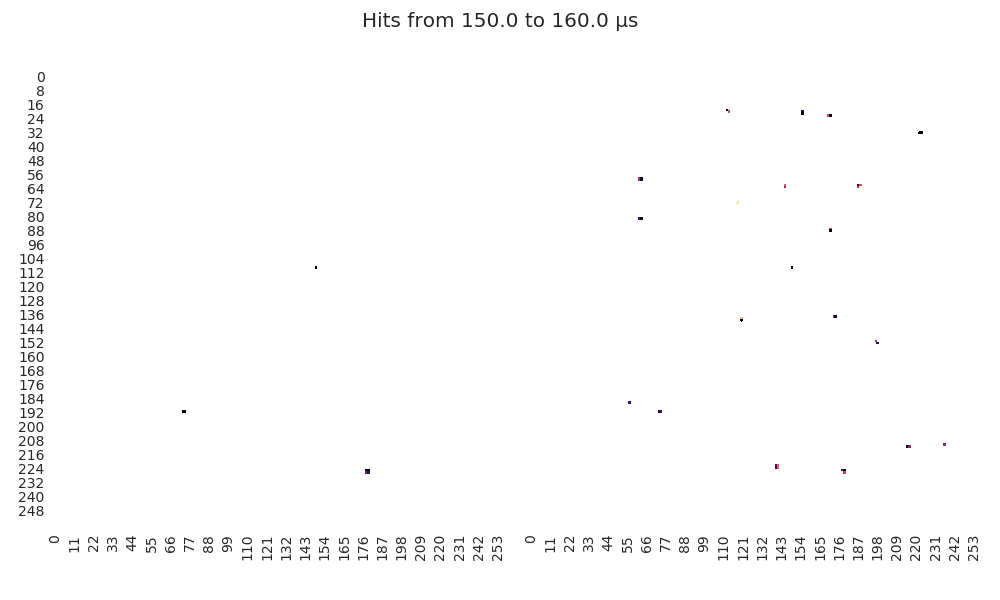

0


<IPython.core.display.Javascript object>


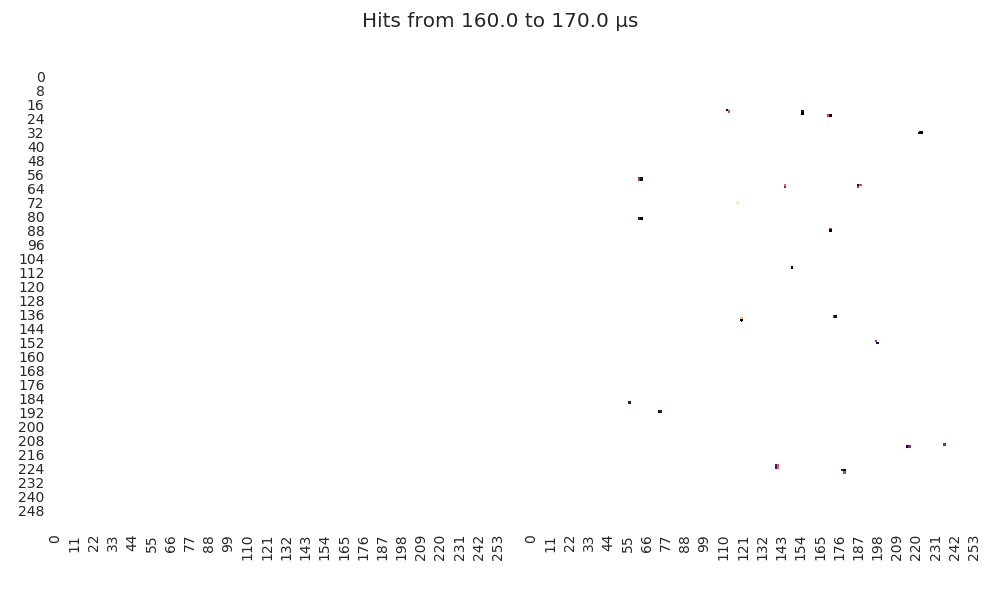

5


<IPython.core.display.Javascript object>


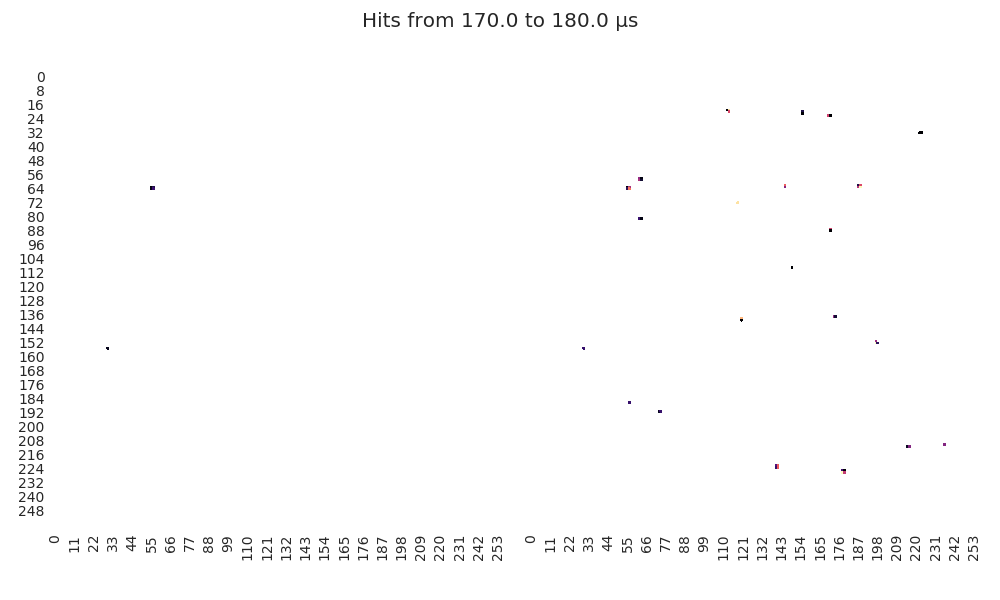

5


<IPython.core.display.Javascript object>


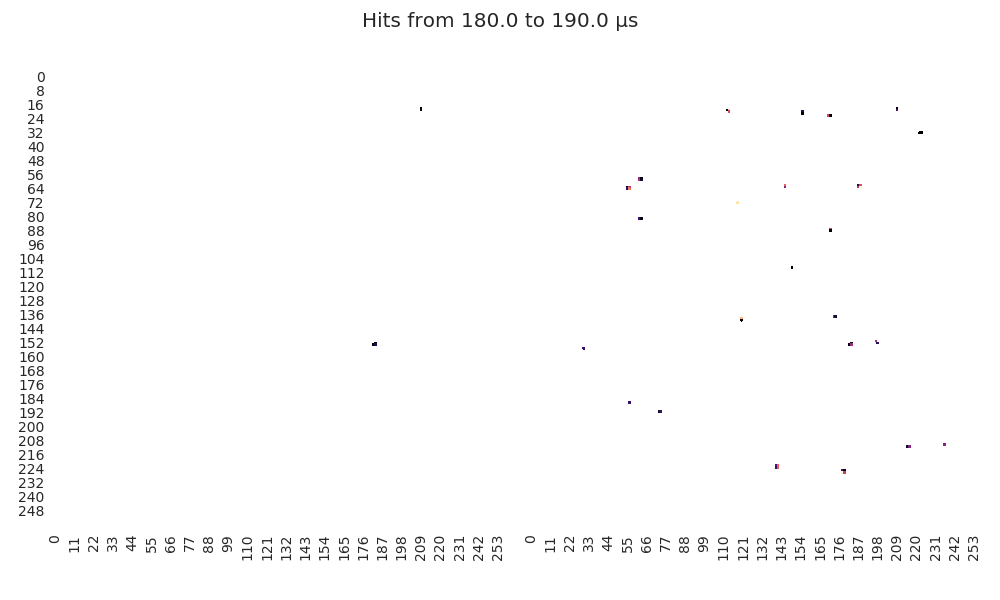

6


<IPython.core.display.Javascript object>


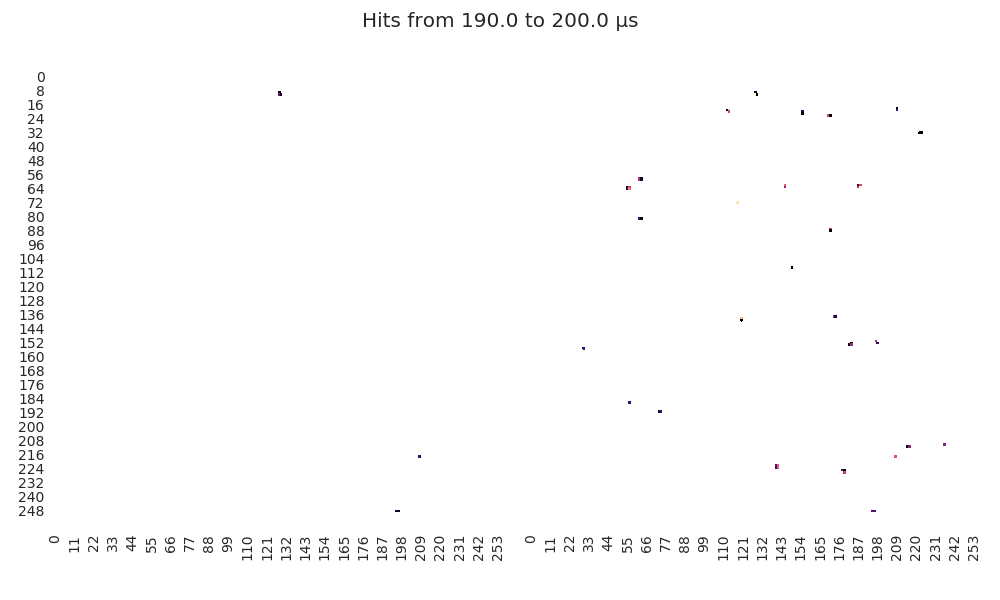

In [22]:
gif_plot(start, gif_array,int_array, del_t)